# Importing libraries

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import itertools

# Reading the file and inspecting the data

In [188]:
# read the dataset
df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [189]:
df.shape

(167, 10)

The columns - _exports, health, and imports_ are present in the form of gdpp percentage. 

In [190]:
df['exports']=(df['exports']/100)*df['gdpp']
df['health']=(df['health']/100)*df['gdpp']
df['imports']=(df['imports']/100)*df['gdpp']
#df.drop(['exports', 'health', 'imports'], inplace=True, axis = 1)

In [191]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Let's see the distribution of data on few variables

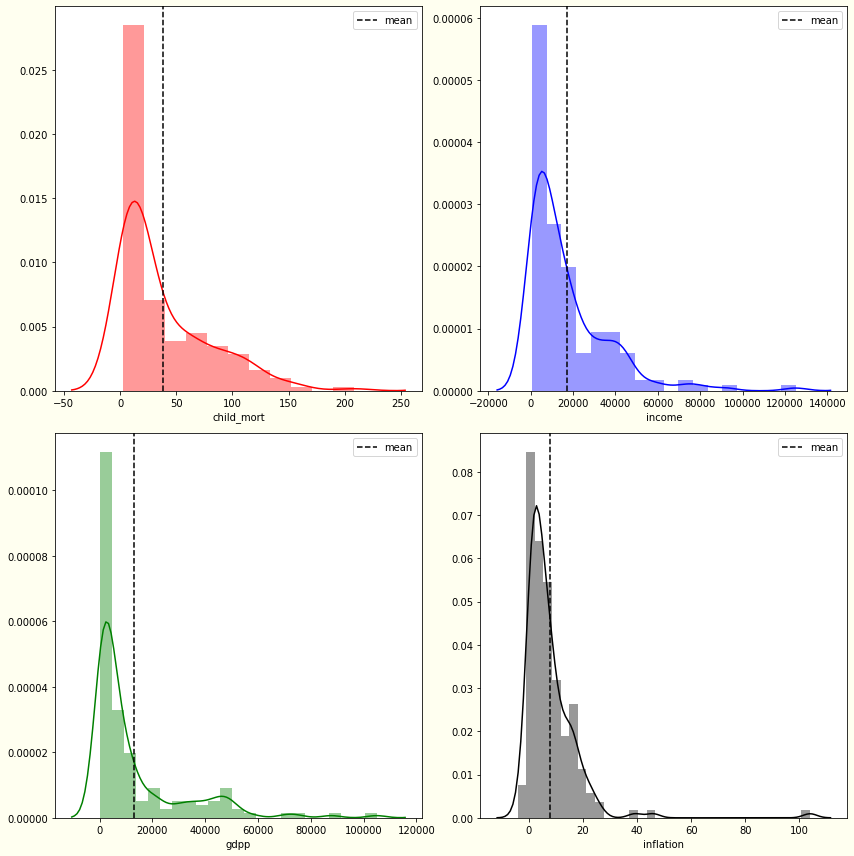

In [192]:
cols = ['child_mort', 'income','gdpp', 'inflation']
length = len(cols)
cs = ["r","b","g","k"]


ax = plt.figure(figsize=(12,12))
ax.set_facecolor("ivory")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(df[df[i].notnull()][i],color=k)
    plt.axvline(df[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    #plt.title(i)
    plt.subplots_adjust(hspace = .2)
    
plt.tight_layout()    

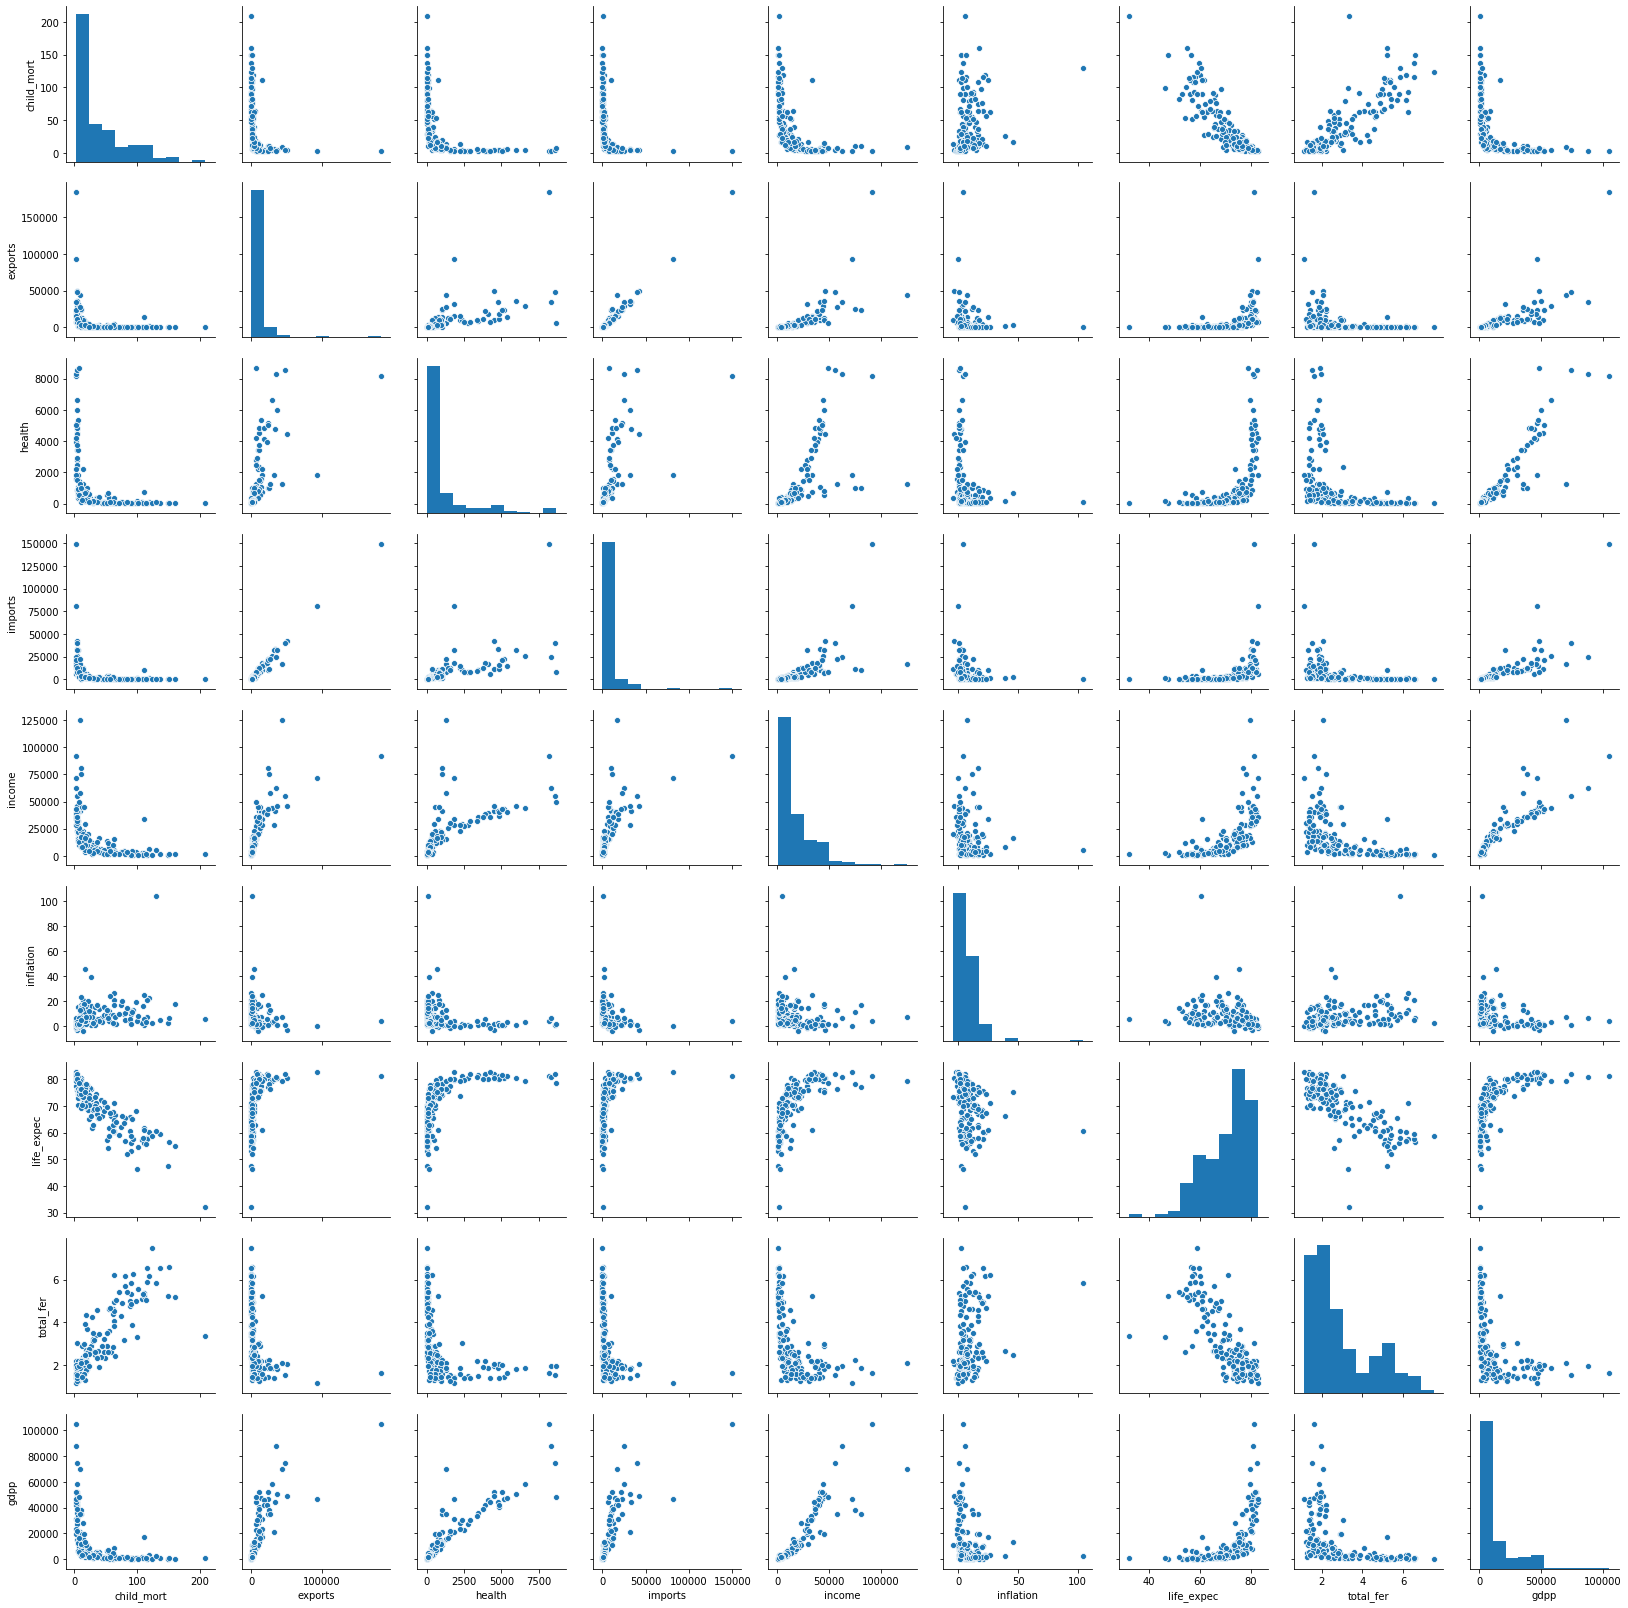

In [193]:
sns.pairplot(df)

The child mortality rate is high in countries with low income and low gdpp.Let's take a closer look

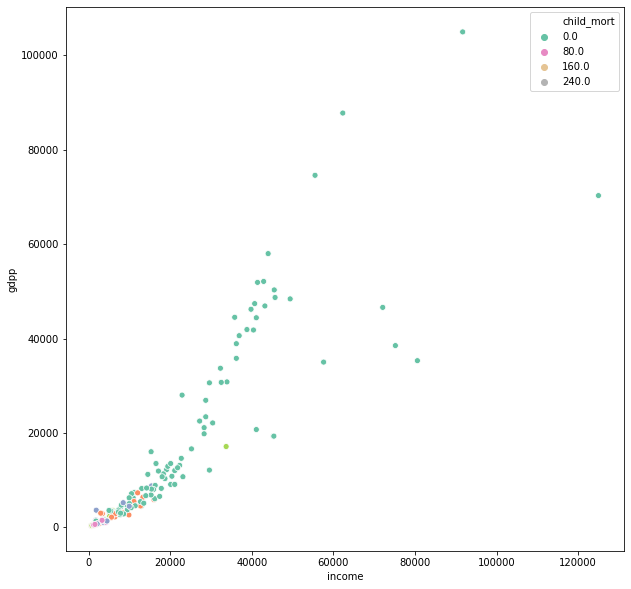

In [194]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='income', y='gdpp', hue='child_mort',  data=df, palette='Set2')

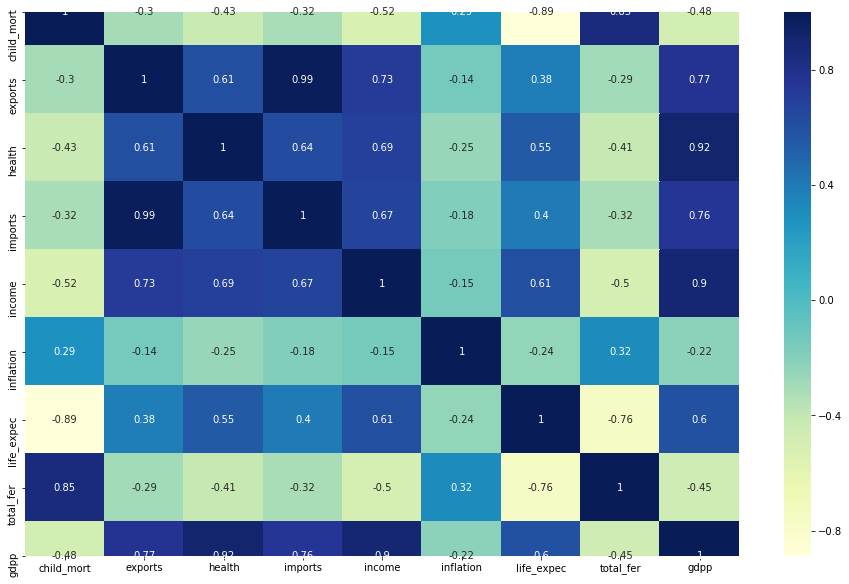

In [195]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

There are high coorelated variables such as imports and exports, imports and income

## We will have a look on the lowest 10 countries for each factor.


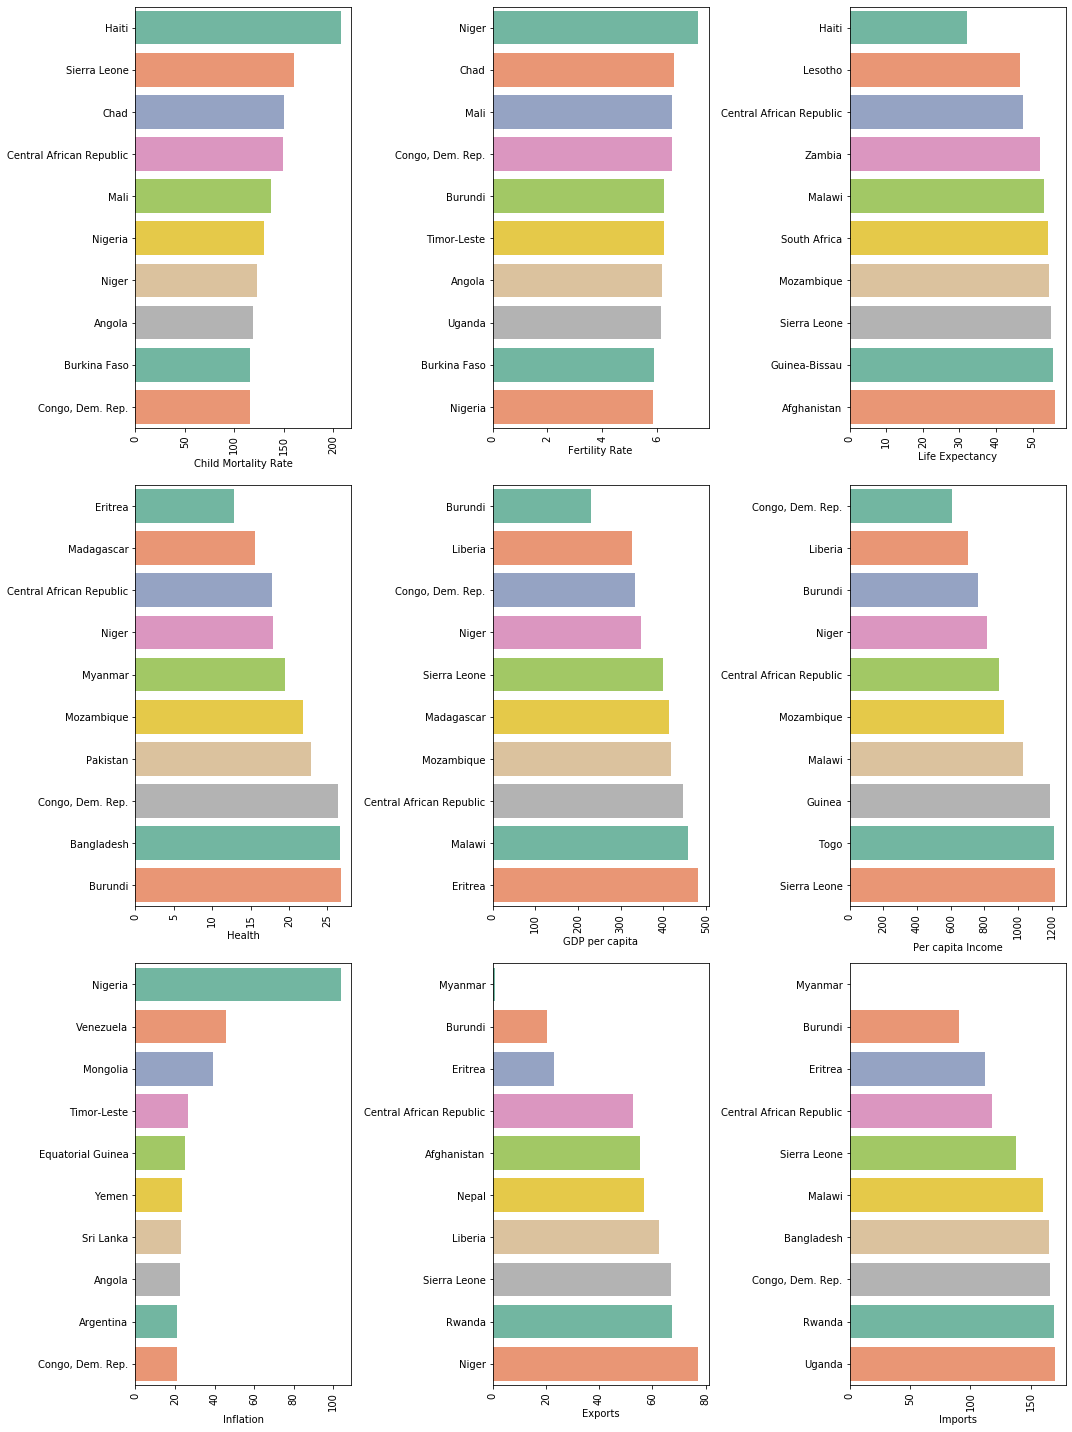

In [197]:
fig, axs = plt.subplots(3,3,figsize = (15,20))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(y='country', x='child_mort', data= top10_child_mort, ax = axs[0,0], palette='Set2')
plt1.set(ylabel = '', xlabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(y='country', x='total_fer', data= top10_total_fer, ax = axs[0,1], palette='Set2')
plt1.set(ylabel = '', xlabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(y='country', x='life_expec', data= bottom10_life_expec, ax = axs[0,2], palette='Set2')
plt1.set(ylabel = '', xlabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(y='country', x='health', data= bottom10_health, ax = axs[1,0], palette='Set2')
plt1.set(ylabel = '', xlabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(y='country', x='gdpp', data= bottom10_gdpp, ax = axs[1,1], palette='Set2')
plt1.set(ylabel = '', xlabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(y='country', x='income', data= bottom10_income, ax = axs[1,2], palette='Set2')
plt1.set(ylabel = '', xlabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(y='country', x='inflation', data= top10_inflation, ax = axs[2,0], palette='Set2')
plt1.set(ylabel = '', xlabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(y='country', x='exports', data= bottom10_exports, ax = axs[2,1], palette='Set2')
plt1.set(ylabel = '', xlabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(y='country', x='imports', data= bottom10_imports, ax = axs[2,2], palette='Set2')
plt1.set(ylabel = '', xlabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()    


# Diving into a bit of visualization to look for outliers 


In [198]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [199]:
#Looking for only numerical columns
colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist()

In [200]:
colnames_numerics_only

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

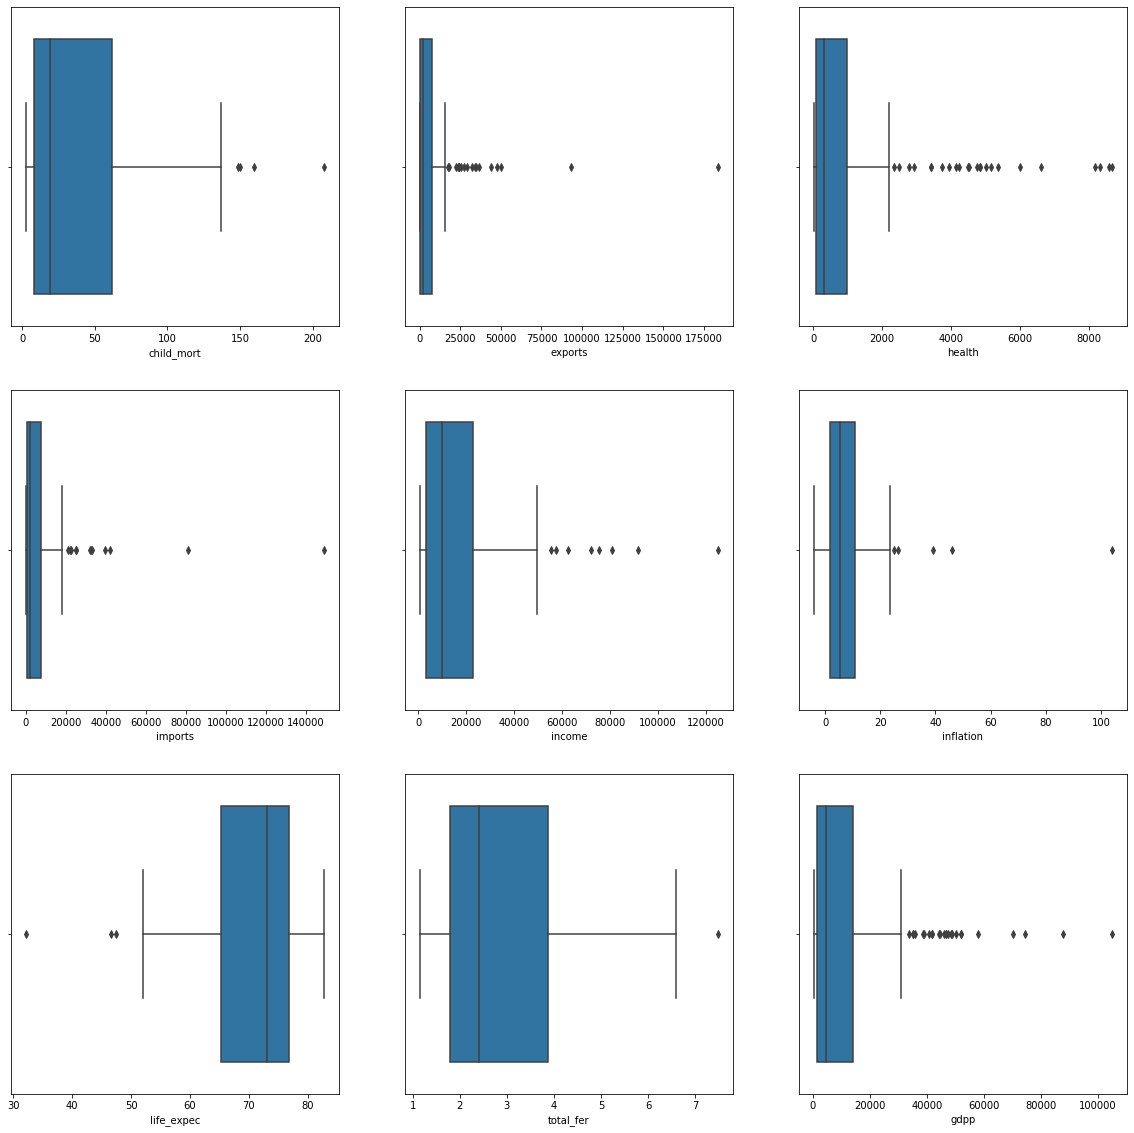

In [201]:
#Plotting boxplots

plt.figure(figsize=(20, 20))

for index,col in enumerate(colnames_numerics_only): 
    plt.subplot(3,3,index+1)
    sns.boxplot(df[col])
plt.show()

In [202]:
#Let's first handle gdpp and we'll work on a copy of the dataframe
handle_outliers=df.copy()

In [203]:
#Creating a function for calculating IQR

def check_outliers(df, x):
    q1, q3= np.percentile(df[x],[25,75])
    iqr=q3-q1 
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    #threshold = df[x].quantile([0.99]).values[0]
    return upper_bound

In [204]:
threshold_gdpp=check_outliers(df, 'gdpp')

In [205]:
handle_outliers[handle_outliers['gdpp'] > threshold_gdpp]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900


In [206]:
handle_outliers[handle_outliers['gdpp'] > threshold_gdpp].count() #There are 25 rows in each column. 

country       25
child_mort    25
exports       25
health        25
imports       25
income        25
inflation     25
life_expec    25
total_fer     25
gdpp          25
dtype: int64

In [207]:
#Capping the values
handle_outliers['gdpp']=np.clip(handle_outliers['gdpp'], a_min = None, a_max = threshold_gdpp)



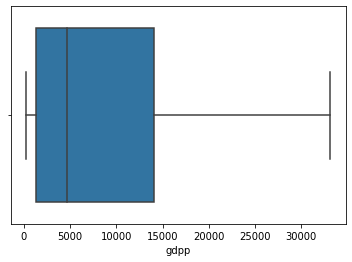

In [208]:
sns.boxplot(handle_outliers['gdpp'])

In [209]:
#We can retain the values instead of deleting any data, since each row gives information about some country. 

#The outliers could be the information of the developed countries

#We will perform the next steps on the original dataframe

# Clustering begins

## But first, scaling!

In [210]:
scaler=StandardScaler()

In [211]:
df_scaled=df.drop('country', axis=1) #Creating a new dataframe for scaling data with just the numerical columns

In [212]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [213]:
df_scaled=scaler.fit_transform(df_scaled)

In [214]:
df_scaled = pd.DataFrame(df_scaled)

# KMeans

## But first, Hopkins test!

In [215]:
#Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
import pandas as pd

 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

No. of clusters = 4

In [216]:

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_scaled)
df_scaled = pd.DataFrame(df_scaled)
hopkins(df_scaled)

0.9175360987978313

The above outputs shows the high cluster tendency of data

### Let's see what the elbow curve has to say:

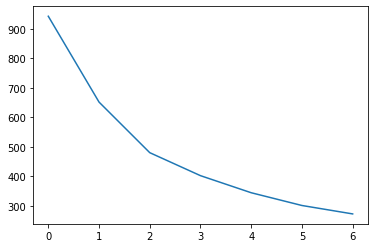

In [218]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [255]:
#Well, there's an elbow at 2; we will keep 3 as a good option because dividing the data set into two groups won't give much insights

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [220]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.4277518271600435
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.35197421857905176
For n_clusters=7, the silhouette score is 0.2899809861218265
For n_clusters=8, the silhouette score is 0.31000862067001206


In [221]:
# n_clusters=5 gives the best score of 0.43347478209451806 after n_clusters=2, which is 0.45863306035476264
#And here again 2 gives the best score but that's not adding any value.

## Let's go with 4 clusters. Choosing the middle ground, considering the elbow curve method and silhoutte analysis

In [222]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [223]:
# assign the label
df['cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


## Let's see some visualization w.r.t cluster_id

In [224]:
df['cluster_id'].value_counts()

2    88
0    48
1    29
3     2
Name: cluster_id, dtype: int64

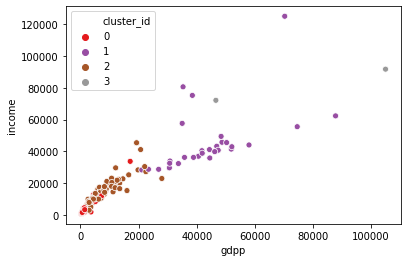

In [269]:
# Plotting income with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = df, palette='Set1')

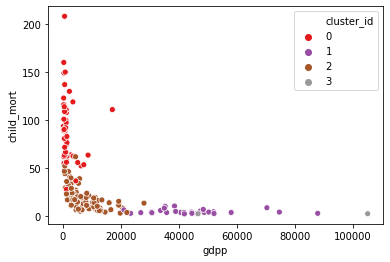

In [226]:
# Plotting child_mort with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df, palette='Set1')

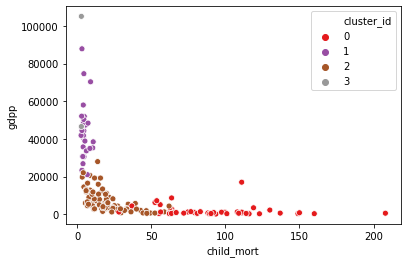

In [268]:
# Plotting the gdpp with respect to the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df, palette='Set1')

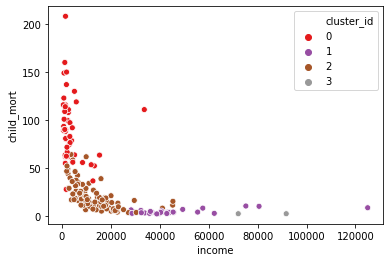

In [228]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df, palette='Set1')

In [229]:
df.groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
1,5.082759,21511.096552,4084.970000,18129.900000,45800.000000,2.837690,80.403448,1.813793,44017.241379
2,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364
3,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000


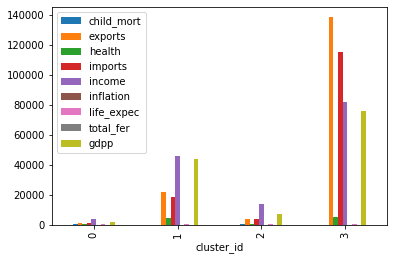

In [230]:
df.groupby('cluster_id').mean().plot(kind = 'bar') #Plotting all the columns w.r.t. cluster ID


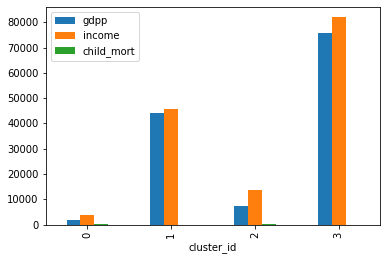

In [231]:
df[['gdpp','income','child_mort', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')
#Picking few columns to plot w.r.t cluster ID

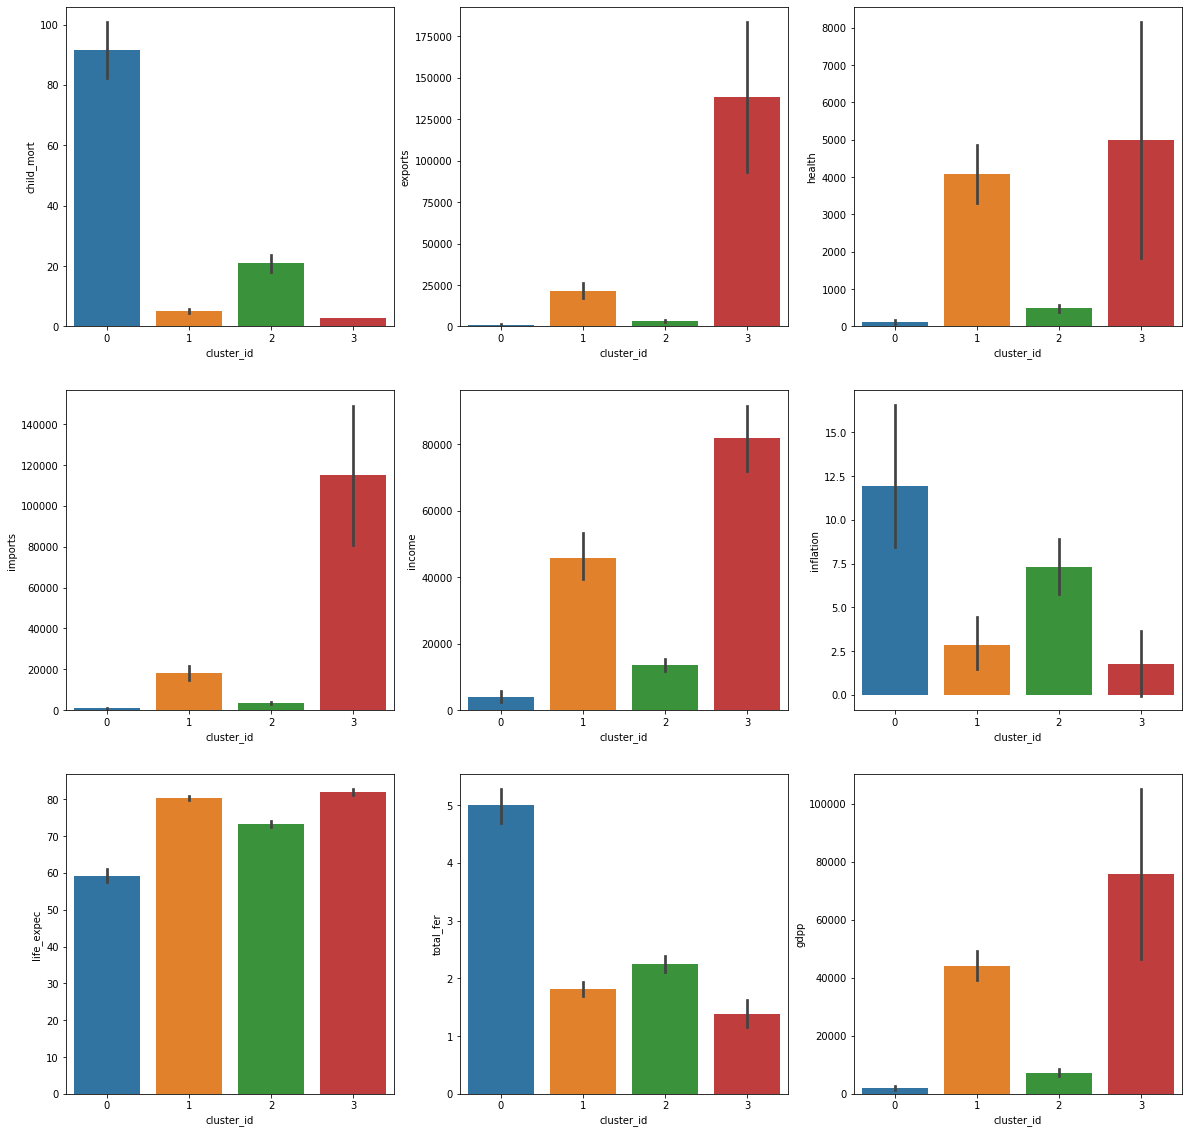

In [232]:
#Plotting cluster ID w.r.t each column

plt.figure(figsize=(20, 20))
for index,col in enumerate(colnames_numerics_only): 
    plt.subplot(3,3,index+1)
    sns.barplot(x='cluster_id', y=df[col], data=df)
plt.show()

In [256]:
#CLuster 1, that is cluster_id=0, seems to be in the dire need of HELP. Let's find the top countries based on low gdpp, low income, high child mortaility rate

In [261]:
countries=df[df['cluster_id']==0].sort_values(by=["gdpp", 'income', 'child_mort'], ascending=[True, True, False])

In [262]:
#Top 10 countries that need monetary assitance:
countries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,5_cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0,1,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0,1,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0,1,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0,1,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0,1,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0,1,0


## The top five countries that HELP should assist are (as per KMeans algo): 

Burundi

Liberia

Congo, Dem. Rep.

Niger

Sierra Leone

# Let's go again with KMeans but now with 5 clusters, as suggested by Silhoutte analysis

In [236]:
# final model with k=3
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [237]:
# assign the label
df['5_cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,5_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,2


## Let's see some visualization w.r.t 5_cluster_id

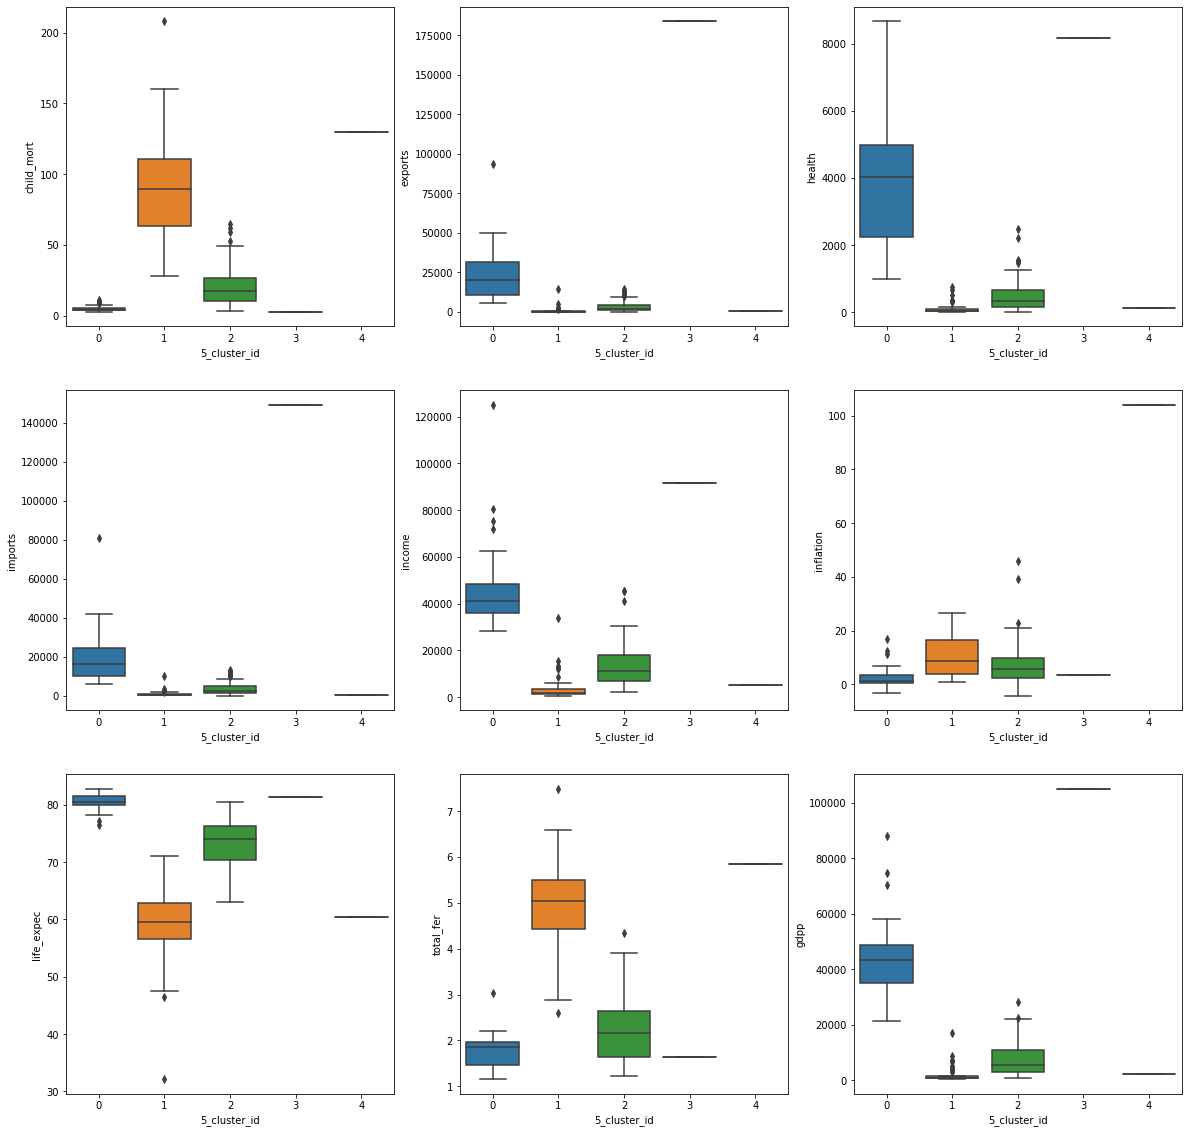

In [238]:
plt.figure(figsize=(20, 20))
for index,col in enumerate(colnames_numerics_only): 
    plt.subplot(3,3,index+1)
    sns.boxplot(x='5_cluster_id', y=df[col], data=df)
plt.show()

In [264]:
#We see this output because of the outliers.

#there are some max values that have taken form of the clusters, considering the kmeans is a 'centroid' model, we could change this by giving the random_state as seed.

#CLuster 2, that is cluster_id=1, seems to be in the dire need of HELP. Let's find the top countries based on low gdpp, low income, high child mortaility rate

In [265]:
countries_k5=df[df['5_cluster_id']==1].sort_values(by=["gdpp", 'income', 'child_mort'], ascending=[True, True, False])

In [266]:
countries_k5.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,5_cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0,1,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0,1,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0,1,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0,1,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0,1,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0,1,0


In [242]:
#We get the same list of countries as we got with 4 clusters

# Let's check out Hierarchical Clustering

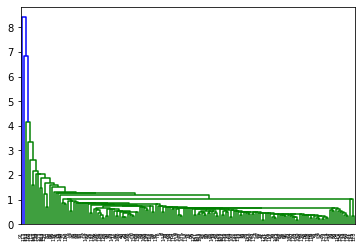

In [243]:
# single linkage
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

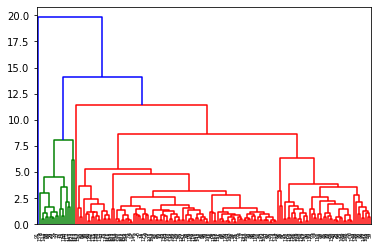

In [244]:
# complete linkage
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [245]:
# Looking at the dedrogram it is observed that cutting it at n = 3 is most optimal.

In [246]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [247]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,5_cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,2,0


In [248]:
#Let's check out how the cluster labels placed w.r.t child_mort, income, and gdpp

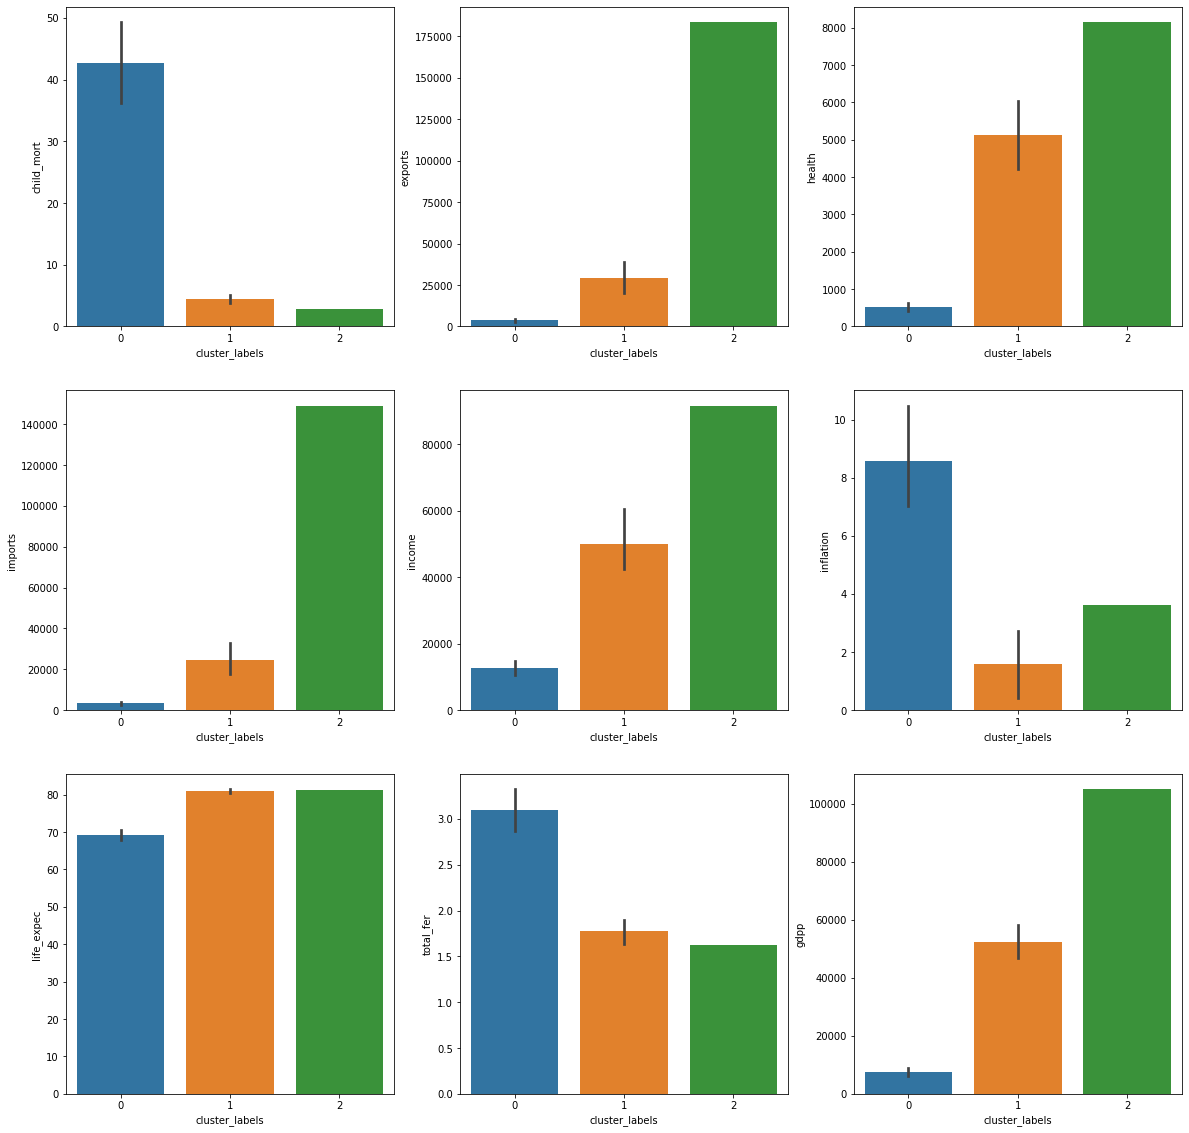

In [249]:
plt.figure(figsize=(20, 20))
for index,col in enumerate(colnames_numerics_only): 
    plt.subplot(3,3,index+1)
    sns.barplot(x='cluster_labels', y=df[col], data=df)
plt.show()

In [250]:
#Cluster label with 0 suggests countries with higher child mortality rate and low income and gdpp

In [251]:
df.groupby('cluster_labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,5_cluster_id
cluster_labels,,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,1.270270,1.533784
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.111111,0.000000
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,3.000000,3.000000


In [252]:
countries_hc=df[df['cluster_labels']==0].sort_values(by=["gdpp", 'income', 'child_mort'], ascending=[True, True, False])

In [253]:
countries_hc.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,5_cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0,1,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0,1,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0,1,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0,1,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0,1,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0,1,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0,1,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0,1,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0,1,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0,1,0


# From both the methods we got the same countries!

- Burundi

- Liberia

- Congo, Dem. Rep.

- Niger

- Sierra Leone
